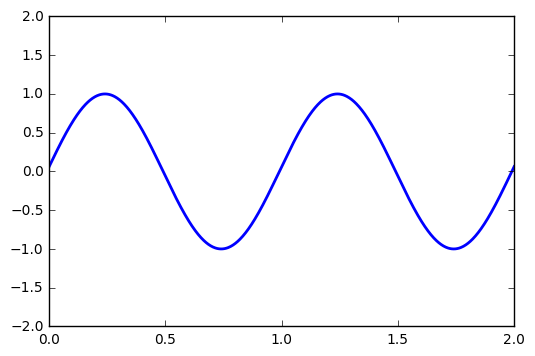

FileNotFoundError: [Errno 2] No such file or directory: 'sampleText.txt'

In [10]:
import numpy as np
from scipy import integrate
from matplotlib.pylab import *
 
def f(t, y):
    """
    Dynamic balance for a CSTR
 
    C_A = y[0] = the concentration of A in the tank, mol/L
 
    Returns dy/dt = F/V*(C_{A,in} - C_A) - k*C_A^2
    """
    k=1;
 
    # Assign some variables for convenience of notation
    CA = y[0]
 
    # Output from ODE function must be a COLUMN vector, with n rows
    n = len(y)      # 1: implies its a single ODE
    dydt = np.zeros((n,1))
    dydt[0] = y[1]
    dydt[1] = -k*y[0]
    return dydt
 
# The ``driver`` that will integrate the ODE(s):
if __name__ == '__main__':
 
    # Start by specifying the integrator:
    # use ``vode`` with "backward differentiation formula"
    r = integrate.ode(f).set_integrator('vode', method='bdf')
 
    # Set the time range
    t_start = 0.0
    t_final = 10.0
    delta_t = 0.1
    # Number of time steps: 1 extra for initial condition
    num_steps = np.floor((t_final - t_start)/delta_t) + 1
 
    # Set initial condition(s): for integrating variable and time!
    x0= 0.5;
    v0=0;
    r.set_initial_value([x0,v0], t_start)
 
    # Additional Python step: create vectors to store trajectories
    t = np.zeros((num_steps, 1))
    x = np.zeros((num_steps, 1))
    t[0] = t_start
    x[0] = x0
 
    # Integrate the ODE(s) across each delta_t timestep
    k = 1
    while r.successful() and k < num_steps:
        r.integrate(r.t + delta_t)
 
        # Store the results to plot later
        t[k] = r.t
        x[k] = r.y[0]
        k += 1
 
    # All done!  Plot the trajectories:
    plot(t, x)
    grid('on')
    xlabel('Time [minutes]')
    ylabel('Amplitude')
    show()